In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/oasis_longitudinal - edited.csv')

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Condition
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Negative
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Negative
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,Positive
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,Positive
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
 15  Condition   373 non-null    object 
dtypes: float64(5), int64(5), object(6)
memory usage: 46.8+ KB


In [ ]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
Condition      0
dtype: int64

In [ ]:
df['SES'] = df['SES'].fillna(df['SES'].mean())

In [ ]:
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].mean())

In [ ]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
Condition     0
dtype: int64

In [ ]:
#encode otomatis
#pembuatan instance labelcoder
le = LabelEncoder()

cols_dua_unique = ['Subject ID','MRI ID','Hand', 'Group', 'M/F', 'Condition']

for col in cols_dua_unique:
  df[col] = le.fit_transform(df[col])

df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Condition
0,0,0,2,1,0,1,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,0
1,0,1,2,2,457,1,0,88,14,2.000000,30.0,0.0,2004,0.681,0.876,0
2,1,2,1,1,0,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,1
3,1,3,1,2,560,1,0,76,12,2.460452,28.0,0.5,1738,0.713,1.010,1
4,1,4,1,3,1895,1,0,80,12,2.460452,22.0,0.5,1698,0.701,1.034,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    int64  
 1   MRI ID      373 non-null    int64  
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    int64  
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         373 non-null    float64
 10  MMSE        373 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
 15  Condition   373 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 46.8 KB


In [ ]:
df.to_csv('oasis_longitudinal3.csv', index=False)

In [ ]:
dataset = pd.read_csv('/content/oasis_longitudinal3.csv')
dataset['Subject ID']=pd.cut(dataset['Subject ID'],
                               bins = [-1, 0, 7, 15, 23, 31, 39, 47, 55, 63, 71, 79, 87, 95, 103, 111, 119, 127, 135, 143, 151],
                               labels = ['0', '7', '15', '23', '31', '39', '47', '55', '63', '71', '79', '87', '95', '103', '111', '119', '127', '135', '143', '151'])

dataset['MRI ID']=pd.cut(dataset['MRI ID'],
                         bins = [-1, 0, 34, 69, 104, 139, 174, 209, 244, 279, 314, 349, 384],
                         labels = ['0', '34', '69', '104', '139', '174', '209', '244', '279', '314', '349', '384'])

dataset['Group']=pd.cut(dataset['Group'],
                      bins = [-1, 0, 1, 2],
                      labels = ['0', '1', '2'])

dataset['Visit']=pd.cut(dataset['Visit'],
                      bins = [0, 1, 2, 3, 4, 5],
                      labels = ['1', '2', '3', '4', '5'])

dataset['MR Delay']=pd.cut(dataset['MR Delay'],
                      bins = [-1,0, 99, 199, 299, 399, 499, 599, 699, 799, 899, 999, 1099, 1199, 1299, 1399, 1499, 1599, 1699, 1799, 1899, 1999, 2099, 2199, 2299, 2399, 2499, 2599, 2699],
                      labels = ['0', '99', '199', '299', '399', '499', '599', '699', '799', '899', '999', '1099', '1199', '1299', '1399', '1499', '1599', '1699', '1799', '1899', '1999', '2099', '2199', '2299', '2399', '2499', '2599', '2699'])

dataset['M/F']=pd.cut(dataset['M/F'],
                      bins = [-1, 0, 1],
                      labels = ['0', '1'])

dataset['Hand']=pd.cut(dataset['Hand'],
                      bins = [-1, 0],
                      labels = ['0'])

dataset['Age']=pd.cut(dataset['Age'],
                      bins = [56, 60, 64, 69, 74, 79, 84, 89, 94, 99],
                      labels = ['60', '64', '69', '74', '79', '84', '89', '94', '99'])

dataset['EDUC']=pd.cut(dataset['EDUC'],
                      bins = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
                      labels = ['6', '8','10', '12',  '14', '16', '18', '20', '22', '24'])

dataset['SES']=pd.cut(dataset['SES'],
                      bins = [0, 1, 2, 3, 4, 5],
                      labels = ['1', '2', '3', '4', '5'])

dataset['MMSE']=pd.cut(dataset['MMSE'],
                      bins = [0, 4, 7, 12, 16, 20, 24, 28, 31],
                      labels = ['4', '7', '12', '16', '20', '24', '28', '31'])

dataset['CDR']=pd.cut(dataset['CDR'],
                      bins = [-1, 0, 1, 2],
                      labels = ['0', '1','2'])

dataset['eTIV']=pd.cut(dataset['eTIV'],
                      bins = [1100, 1199, 1299, 1399, 1499, 1599, 1699, 1779, 1899, 1999, 2099],
                      labels = ['1199', '1299', '1399', '1499', '1599', '1699', '1779', '1899', '1999', '2099'])

dataset['nWBV']=pd.cut(dataset['nWBV'],
                      bins = [0.624, 0.644,	0.664,	0.684,	0.704,	0.724,	0.744,	0.764,	0.784,	0.804,	0.824,	0.844],
                      labels = ['0.644', '0.664',	'0.684',	'0.704',	'0.724',	'0.744',	'0.764',	'0.784',	'0.804',	'0.824',	'0.844'])

dataset['ASF']=pd.cut(dataset['ASF'],
                      bins = [0.776, 0.876,	0.976,	1.076,	1.176,	1.276,	1.376,	1.476,	1.576,	1.676],
                      labels = ['0.876', '0.976',	'1.076',	'1.176',	'1.276',	'1.376',	'1.476',	'1.576',	'1.676'])

dataset['Condition']=pd.cut(dataset['Condition'],
                      bins = [-1, 0, 1],
                      labels = ['0', '1'])

dataset

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Condition
0,0,0,2,1,0,1,0,89,14,2,28,0,1999,0.704,0.976,0
1,0,34,2,2,499,1,0,89,14,2,31,0,2099,0.684,0.876,0
2,7,34,1,1,0,1,0,79,12,3,24,1,1699,0.744,1.076,1
3,7,34,1,2,599,1,0,79,12,3,28,1,1779,0.724,1.076,1
4,7,34,1,3,1899,1,0,84,12,3,24,1,1699,0.704,1.076,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,151,384,1,2,899,1,0,84,16,1,28,1,1699,0.704,1.076,1
369,151,384,1,3,2299,1,0,89,16,1,28,1,1699,0.684,1.076,1
370,151,384,2,1,0,0,0,64,14,2,31,0,1399,0.804,1.376,1
371,151,384,2,2,799,0,0,64,14,2,31,0,1399,0.804,1.376,1


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
feature_cols =['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV','nWBV', 'ASF']
X = dataset[feature_cols]  # feature vector
Y = dataset['Condition']    # label vector

print(X.dtypes)

Subject ID    category
MRI ID        category
Group         category
Visit         category
MR Delay      category
M/F           category
Hand          category
Age           category
EDUC          category
SES           category
MMSE          category
CDR           category
eTIV          category
nWBV          category
ASF           category
dtype: object


In [ ]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")

In [ ]:
c45=clf.fit(X_train, Y_train)

In [ ]:
# make predictions on the testing data
clf_predictions = c45.predict(X_test)

# evaluate the accuracy of the classifier
accuracy = metrics.accuracy_score(Y_test, clf_predictions)
print("Accuracy:", accuracy*100)

Accuracy: 96.42857142857143


In [ ]:
print(confusion_matrix(Y_test, clf_predictions))
print(classification_report(Y_test,clf_predictions))

[[  5   1]
 [  3 103]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.99      0.97      0.98       106

    accuracy                           0.96       112
   macro avg       0.81      0.90      0.85       112
weighted avg       0.97      0.96      0.97       112



In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


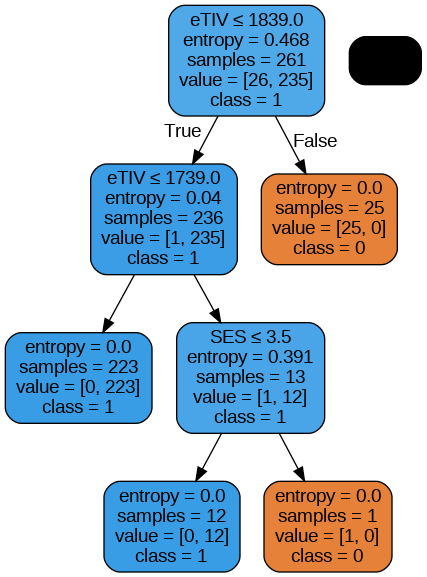

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(c45, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Alzheimers.png')
Image(graph.create_png())

Decision Tree + BPSO

In [ ]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import module
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pyswarms as ps
import time as time
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#import dataset
clf = DecisionTreeClassifier(criterion="entropy")
X = np.array(dataset.drop(['Condition'],1))   # feature vector
Y = np.array(dataset['Condition'])    # label vector
print(X.shape)

(373, 15)


<ipython-input-23-b95568649007>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataset.drop(['Condition'],1))   # feature vector


In [ ]:
def f_per_particle(m, alpha):
  total_features = nfitur

  #proses seleksi fitur PSO
  if np.count_nonzero(m) == 0:
    X_subset = X
  else:
    X_subset = X[:, m==1]
  X_train, X_test, Y_train, Y_test = train_test_split(X_subset, Y, test_size=0.3, random_state=0, shuffle = True)
  c45_01=clf.fit(X_train, Y_train)
  P = (c45_01.predict(X_test) == Y_test).mean()
  j = (alpha * (1.0-P)+(1.0-alpha)*(1-(X_subset.shape[1]/total_features)))
  return j

In [ ]:
def f(x, alpha = 0.88):
  n_particles = x.shape[0]
  j =[f_per_particle(x[i], alpha) for i in range(n_particles)]
  return np.array(j)

options = {'c1':0.5, 'c2': 0.5, 'w':0.9, 'k':30, 'p':2}
nsample, nfitur = X.shape
dimensions = nfitur
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
cost, pos = optimizer.optimize(f, iters = 100)

2023-05-09 01:44:26,013 - pyswarms.discrete.binary - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|100/100, best_cost=0.0237
2023-05-09 01:44:32,894 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.023714285714285757, best pos: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [ ]:
X_selected_features = X[:,pos==1]
X_train, X_test, Y_train, Y_test = train_test_split(X_selected_features, Y, test_size=0.3, random_state=0, shuffle = True)
c45=clf.fit(X_train,Y_train)
subset_performance = (c45.predict(X_test) == Y_test).mean()

In [ ]:
#akurasi yang diperoleh
print('Akurasi: %.3f' % (subset_performance*100))

Akurasi: 98.214


In [ ]:
print(confusion_matrix(c45.predict(X_test), Y_test))
print(classification_report(c45.predict(X_test), Y_test))

[[  6   2]
 [  0 104]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.98      1.00      0.99       104

    accuracy                           0.98       112
   macro avg       0.99      0.88      0.92       112
weighted avg       0.98      0.98      0.98       112



In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
feature_cols2 =['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR','nWBV', 'ASF']
X = dataset[feature_cols2]  # feature vector
Y = dataset['Condition']    # label vector

print(X.dtypes)

Subject ID    category
MRI ID        category
Group         category
Visit         category
MR Delay      category
M/F           category
Hand          category
Age           category
EDUC          category
SES           category
MMSE          category
CDR           category
nWBV          category
ASF           category
dtype: object


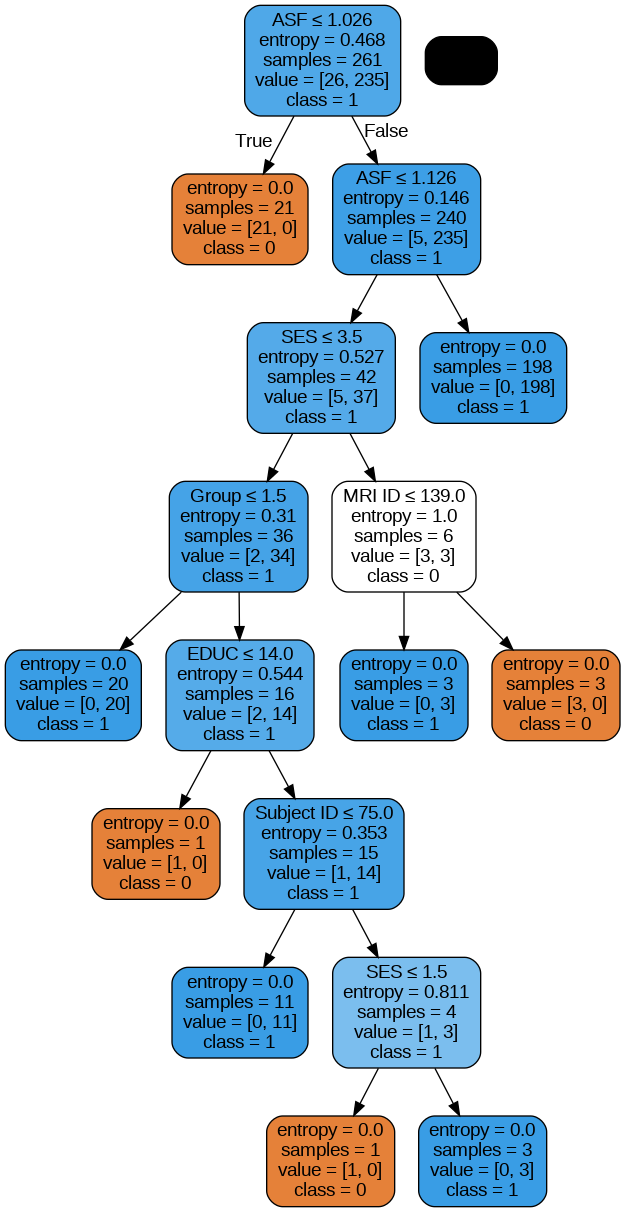

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(c45, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols2, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Alzheimers2.png')
Image(graph.create_png())